In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import os, data_paths as dp
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
dp.stations[0]

'Grove St PATH'

In [3]:
grove_data = pd.read_csv(dp.data_avenue+dp.stationswise+dp.stations[0]+"/"+dp.stations[0]+"_bookings.csv")

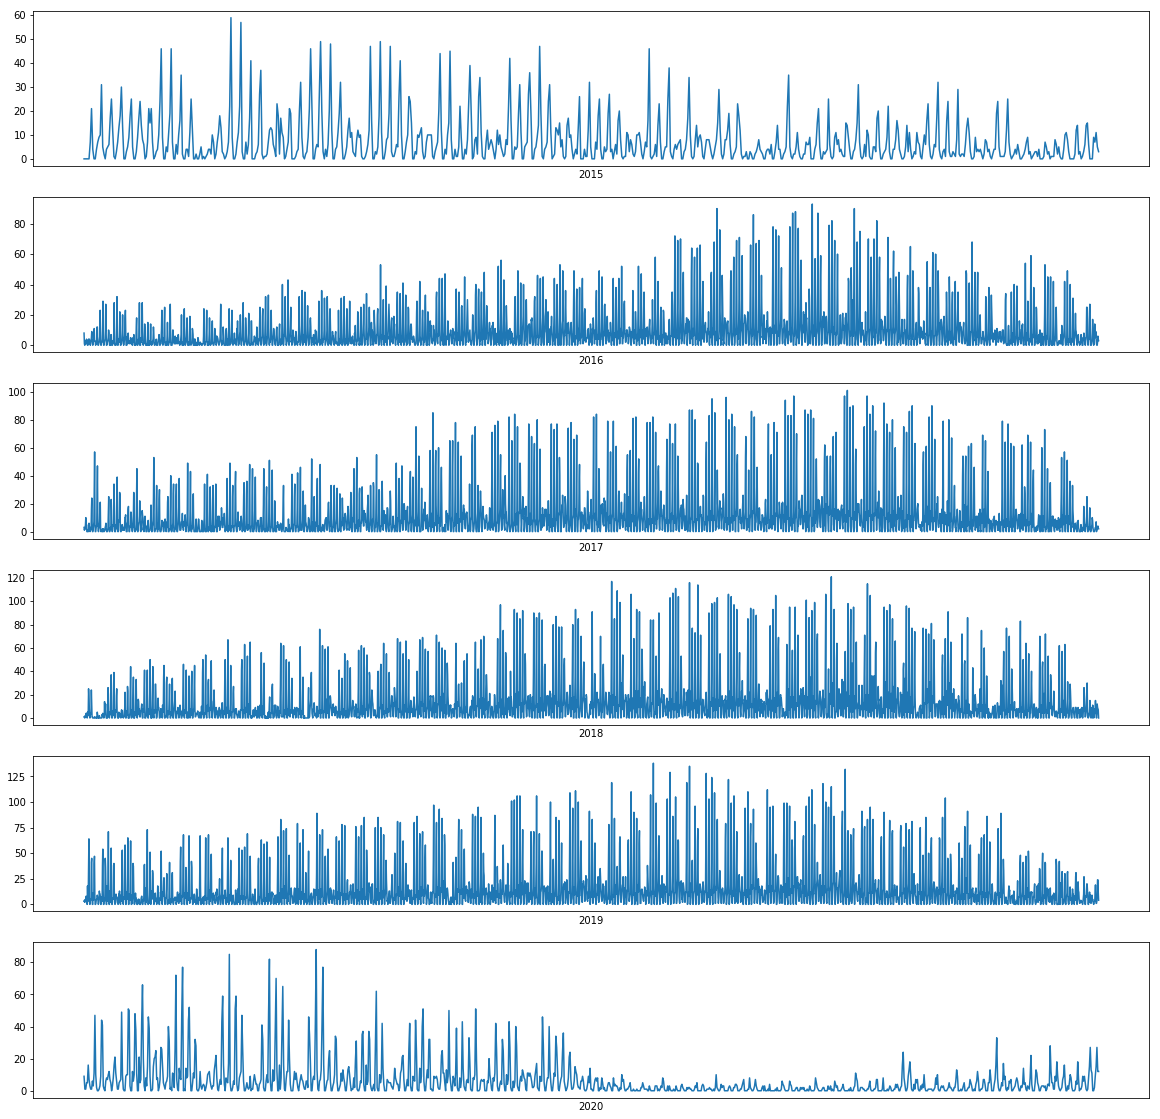

In [4]:
plt.figure(figsize=(20,20))
for yy in [2015,2016,2017,2018,2019,2020]:
    plt.subplot(6,1,yy-2014)
    plt.plot(grove_data[grove_data['YY'] == yy]['Bookings'].values)
    plt.xticks(())
    plt.xlabel(yy)
plt.show()

In [5]:
grove_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13648 entries, 0 to 13647
Data columns (total 6 columns):
YY          13648 non-null int64
MM          13648 non-null int64
DD          13648 non-null int64
Day         13648 non-null int64
HH          13648 non-null object
Bookings    13648 non-null int64
dtypes: int64(5), object(1)
memory usage: 639.8+ KB


In [6]:
grove_data['Day'] = grove_data['Day'].astype(object)
grove_data['MM'] = grove_data['MM'].astype(object)
grove_data['DD'] = grove_data['DD'].astype(object)

In [7]:
grove_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13648 entries, 0 to 13647
Data columns (total 6 columns):
YY          13648 non-null int64
MM          13648 non-null object
DD          13648 non-null object
Day         13648 non-null object
HH          13648 non-null object
Bookings    13648 non-null int64
dtypes: int64(2), object(4)
memory usage: 639.8+ KB


In [8]:
grove_dummies = pd.get_dummies(grove_data)

In [9]:
grove_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13648 entries, 0 to 13647
Data columns (total 60 columns):
YY          13648 non-null int64
Bookings    13648 non-null int64
MM_1        13648 non-null uint8
MM_2        13648 non-null uint8
MM_3        13648 non-null uint8
MM_4        13648 non-null uint8
MM_5        13648 non-null uint8
MM_6        13648 non-null uint8
MM_7        13648 non-null uint8
MM_8        13648 non-null uint8
MM_9        13648 non-null uint8
MM_10       13648 non-null uint8
MM_11       13648 non-null uint8
MM_12       13648 non-null uint8
DD_1        13648 non-null uint8
DD_2        13648 non-null uint8
DD_3        13648 non-null uint8
DD_4        13648 non-null uint8
DD_5        13648 non-null uint8
DD_6        13648 non-null uint8
DD_7        13648 non-null uint8
DD_8        13648 non-null uint8
DD_9        13648 non-null uint8
DD_10       13648 non-null uint8
DD_11       13648 non-null uint8
DD_12       13648 non-null uint8
DD_13       13648 non-null uint8


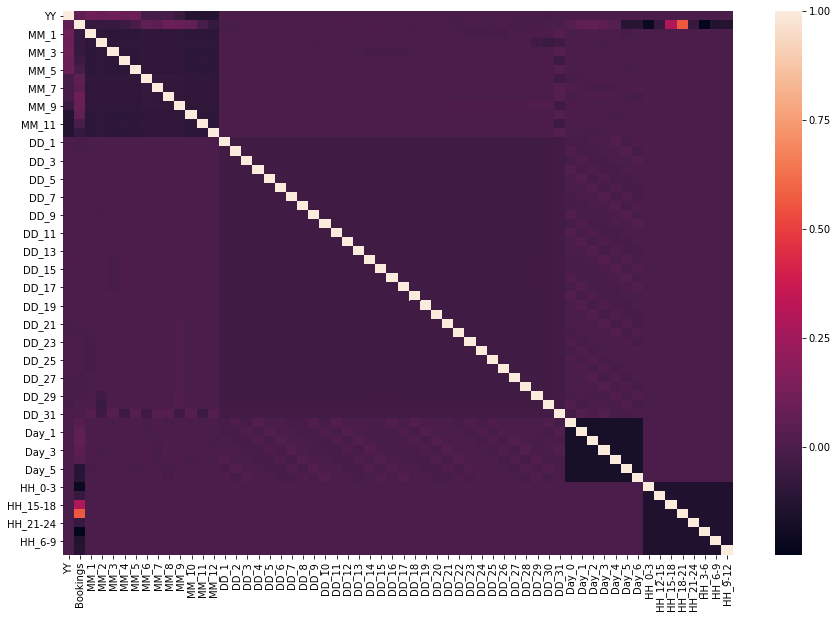

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(grove_dummies.corr())
plt.show()

## Splitting

In [ ]:
grove_data[grove_data['YY'] == 2020][grove_data[grove_data['YY'] == 2020]['MM'] == 1][0]

In [207]:
idx_2020 = grove_data[grove_data['YY'] == 2020].iloc[0,:].name

In [59]:
def tt_split(df, split_idx, test_days = None):
    train = grove_dummies.iloc[:split_idx,:]
    
    if test_days == None:
        test = grove_dummies.iloc[split_idx:,:]
    else:
        test_end_idx = split_idx + (test_days * 8)
        test = grove_dummies.iloc[split_idx:test_end_idx+1,:]
        
        
    X_train = train.drop(columns = ["Bookings"]).values
    X_test = test.drop(columns = ["Bookings"]).values
    y_train = train["Bookings"].values
    y_test = test["Bookings"].values
    
    return X_train, X_test, y_train, y_test

In [75]:
from sklearn.neighbors import KNeighborsRegressor

In [76]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
print(knr.score(X_train,y_train), knr.score(X_test, y_test))

0.7755129755203438 0.7125371425455933


(array([1.0177e+04, 1.7990e+03, 6.2200e+02, 4.7000e+02, 2.2800e+02,
        1.6800e+02, 1.1600e+02, 4.8000e+01, 1.5000e+01, 5.0000e+00]),
 array([  0. ,  13.8,  27.6,  41.4,  55.2,  69. ,  82.8,  96.6, 110.4,
        124.2, 138. ]),
 <a list of 10 Patch objects>)

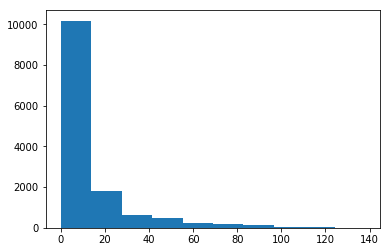

In [18]:
plt.hist(grove_data['Bookings'].values)

In [23]:
end_idx = 13647

In [11]:
def modelPerformance(model, X_train,X_test, y_train, y_test):
    print("====================================================================================")
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rms = np.sqrt(np.sum(np.square(train_predictions - y_train)) / y_train.shape[0])
    test_rms = np.sqrt(np.sum(np.square(test_predictions - y_test)) / y_test.shape[0])
    
    train_mae = np.sum(np.sqrt(np.square(y_train - train_predictions))) / y_train.shape[0]
    test_mae = np.sum(np.sqrt(np.square(y_test - test_predictions))) / y_test.shape[0]
    
    
    
    perf_matrix = [
        ["Train", str(train_score), str(train_rms), str(train_mae)],
        ["Test", str(test_score), str(test_rms), str(test_mae)]
    ]
    print("Model: ",model,"\n\nPerformance and Predictions Trend: ")
    print(perf_matrix)
    plt.figure(figsize=(20,5))
    plt.plot(y_train, label = "Train Values")
    plt.plot(train_predictions, '--', label = "Predicted Train Values")
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    plt.legend()
    plt.show()
    plt.figure(figsize=(20,5))
    plt.plot(y_test, label = "Test Values")
    plt.plot(test_predictions, '--', label = "Predicted Test Values")

    plt.xlabel("Date")
    plt.ylabel("Rentals")
    
    plt.table(cellText=perf_matrix,
        cellLoc="center", colWidths=None,
        rowLabels=None, rowColours=None, rowLoc="center",
        colLabels=["Data","R^2 Score","RMS Score","MAE Score"], colColours="yyyy", colLoc="center",
        loc='top', bbox=None)
    plt.legend()
    plt.box(True)
    plt.show()
    
    
    return model

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.7755129755203438', '8.642967826918186', '4.5353925353925355'], ['Test', '0.7125371425455933', '9.221730996979101', '5.645161290322581']]


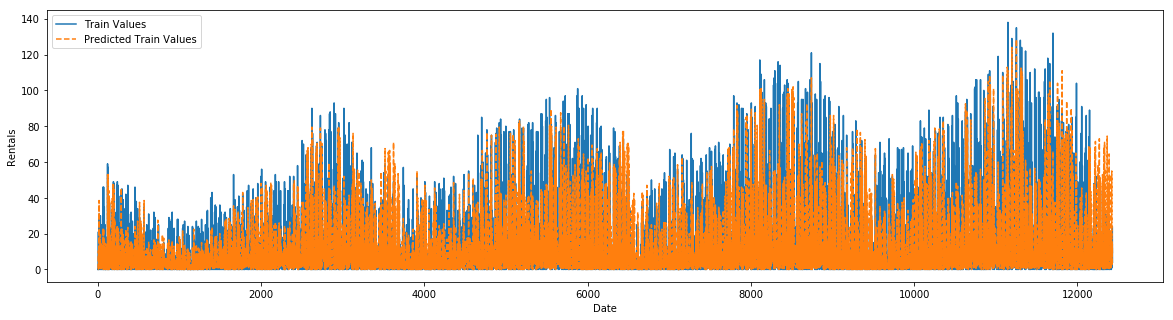

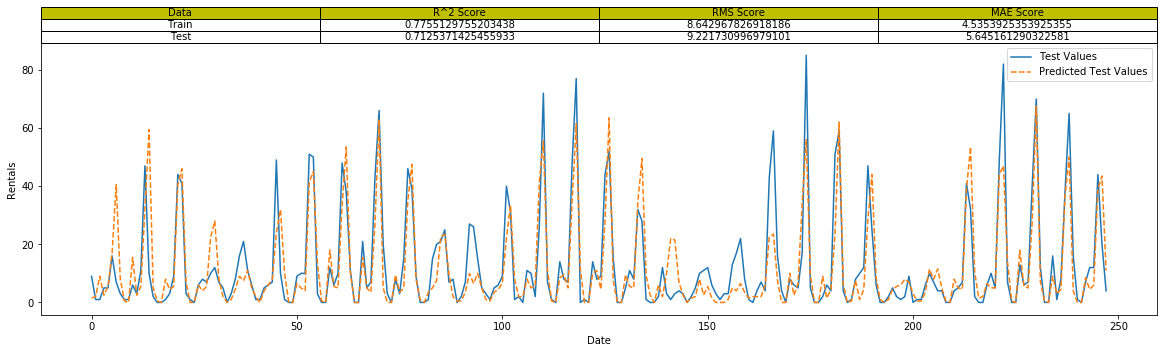

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [77]:
modelPerformance(KNeighborsRegressor(n_neighbors=2), X_train, X_test, y_train, y_test)

In [78]:
scaler = MinMaxScaler(feature_range=(0,1))

In [79]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.5904990727346631', '11.67332882650043', '6.35440797940798'], ['Test', '0.6562152616864609', '10.084743969576007', '5.823924731182795']]


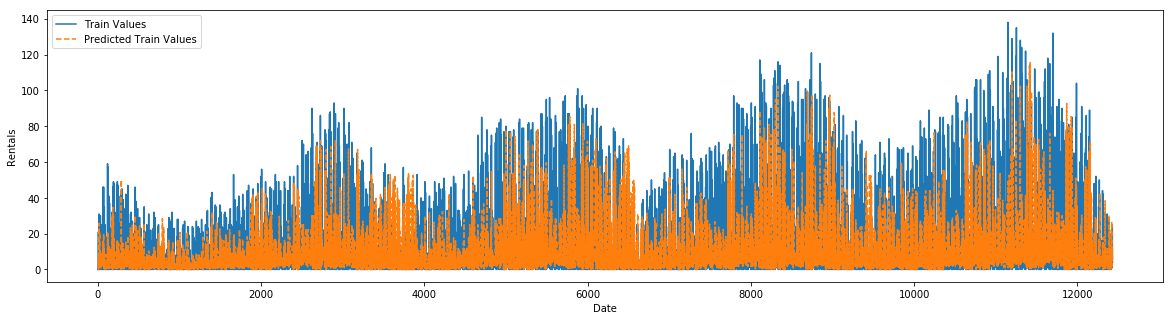

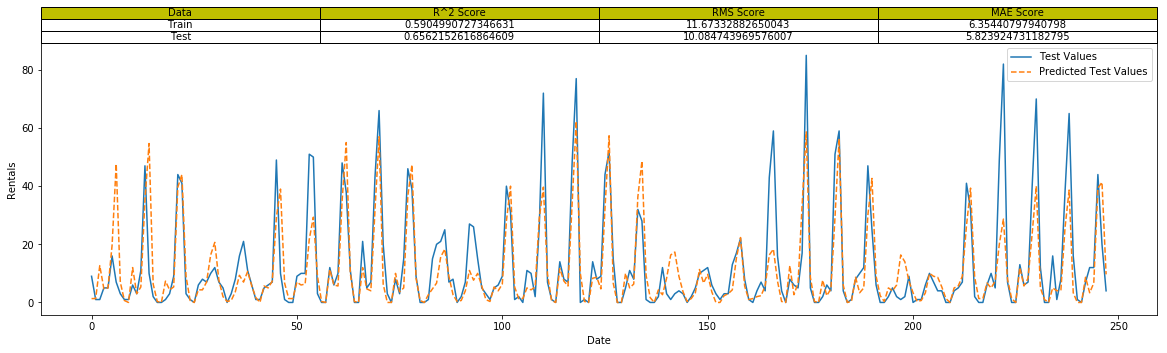

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [80]:
modelPerformance(KNeighborsRegressor(n_neighbors=3), X_train_scaled, X_test_scaled, y_train, y_test)

In [81]:
X_train_scaled[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
a = np.array([1,2,3,4,5,6,7,8,9,0])

In [30]:
a[5-8:5],a[5]

(array([], dtype=int32), 6)

## With Memory

In [22]:
def memoryFeatures(inpt, n_features):
    outpt = np.zeros((n_features,n_features), dtype = int)
    for i in range(len(inpt)):
        row = np.array(inpt[i-n_features : i])
        outpt = np.append(outpt, row)
    del inpt
    return outpt.reshape(-1,n_features)

In [194]:
outpt = memoryFeatures(grove_data['Bookings'].values, 5)

In [197]:
pd.DataFrame(outpt).tail(10)

0   1   2   3   4
13638   0   1   8  15  27
13639   1   8  15  27  13
13640   8  15  27  13  11
13641  15  27  13  11   0
13642  27  13  11   0   0
13643  13  11   0   0   2
13644  11   0   0   2   9
13645   0   0   2   9  15
13646   0   2   9  15  27
13647   2   9  15  27  12

In [25]:
def genMemDataset(df, memory):
    return pd.concat([df, pd.DataFrame(memoryFeatures(df['Bookings'].values, memory))], axis = 1, ignore_index=False)

In [221]:
X_train, X_test, y_train, y_test = tt_split(genMemDataset(grove_dummies, 8), idx_2020, 12679)


In [222]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12432, 59), (12432,), (248, 59), (248,))

In [12]:
models = [LinearRegression(),
          KNeighborsRegressor(n_neighbors=1),
          KNeighborsRegressor(n_neighbors=2), 
          KNeighborsRegressor(n_neighbors=3), 
          KNeighborsRegressor(n_neighbors=4),
          RandomForestRegressor(n_estimators=5), 
          RandomForestRegressor(n_estimators=10), 
          RandomForestRegressor(n_estimators=50)]

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

Performance and Predictions Trend: 
[['Train', '0.609332024301726', '11.401741243402808', '7.672001312138031'], ['Test', '0.5912805919191217', '10.995986821677576', '7.4189453125']]


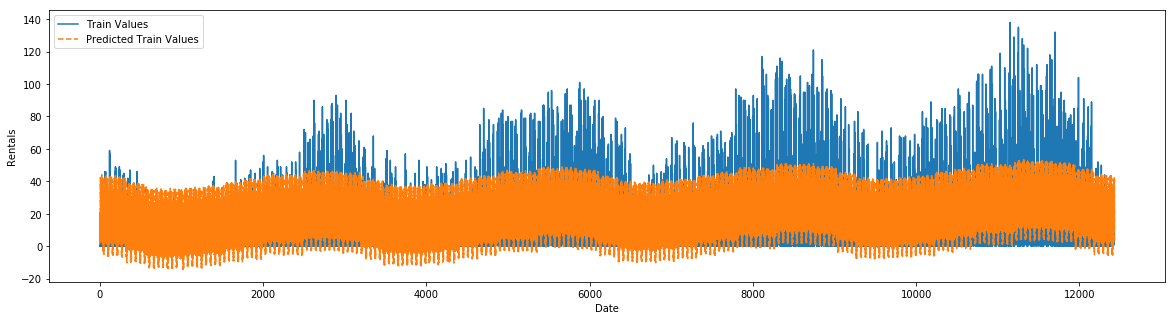

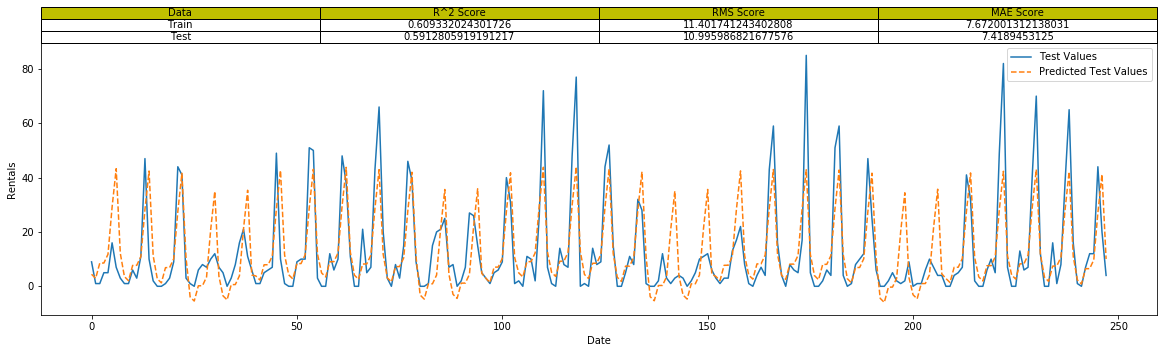

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '1.0', '0.0', '0.0'], ['Test', '0.4883869912493526', '12.30247155865897', '7.133064516129032']]


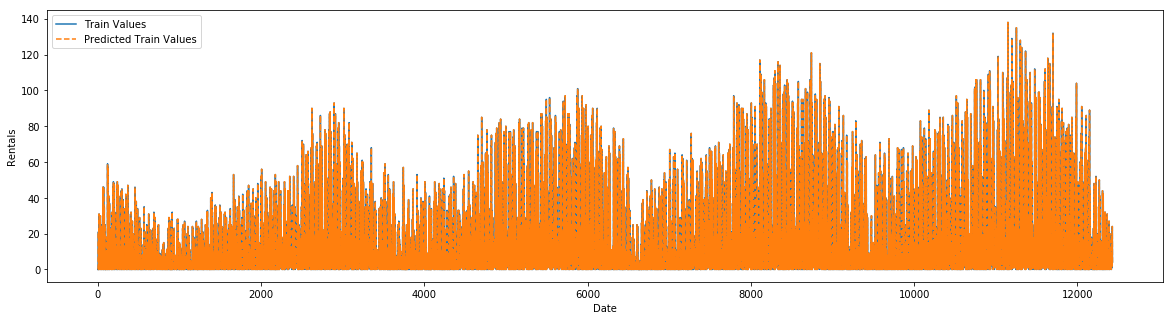

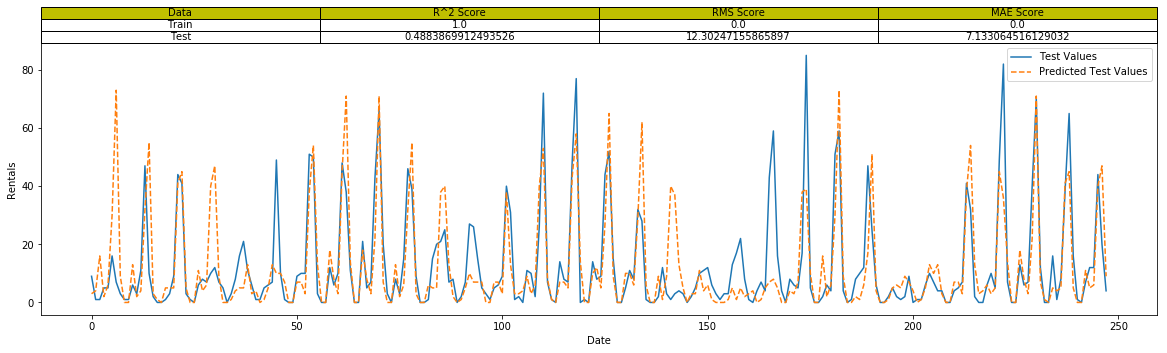

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.7755129755203438', '8.642967826918186', '4.5353925353925355'], ['Test', '0.7125371425455933', '9.221730996979101', '5.645161290322581']]


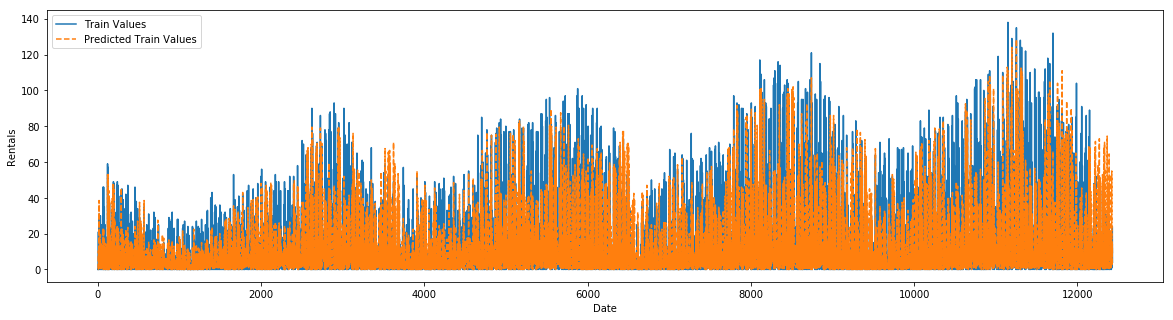

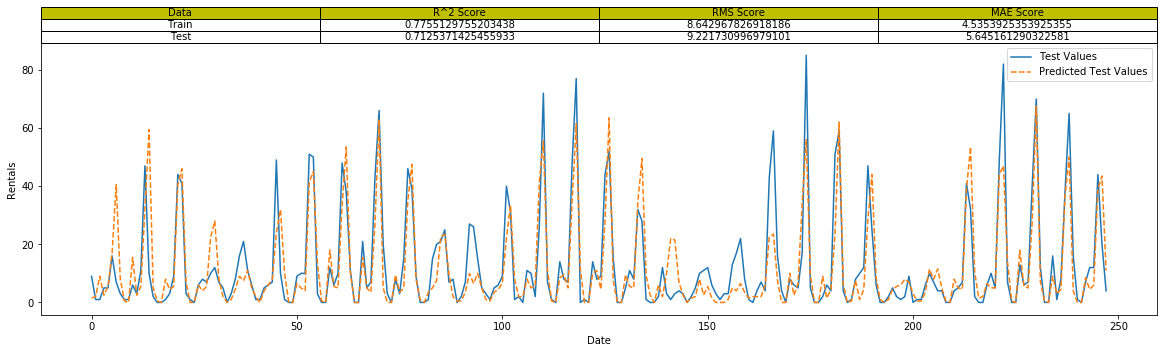

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.5991846318909364', '11.54886905183258', '6.26909051909052'], ['Test', '0.7270261428999809', '8.986324735845267', '5.315860215053764']]


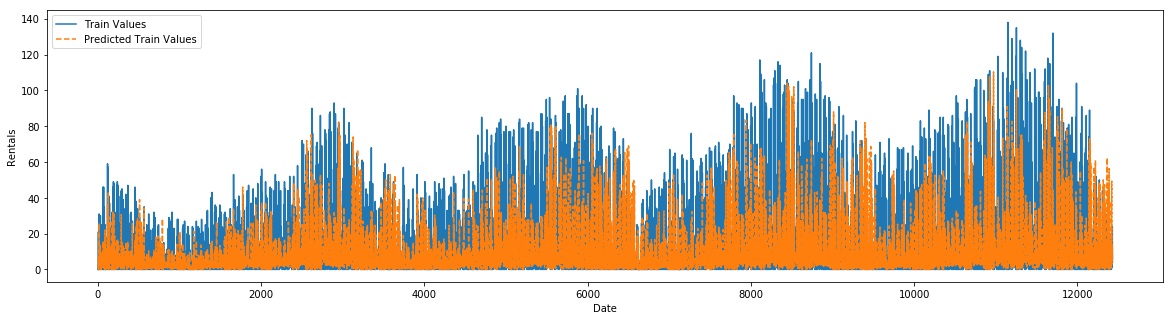

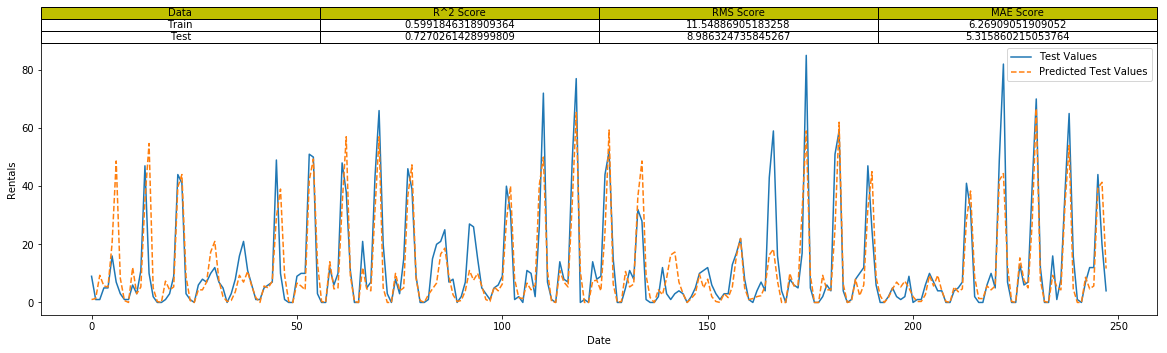

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.5097197544040943', '12.772898824362978', '7.0145390926640925'], ['Test', '0.7146890248889131', '9.187150256674247', '5.387096774193548']]


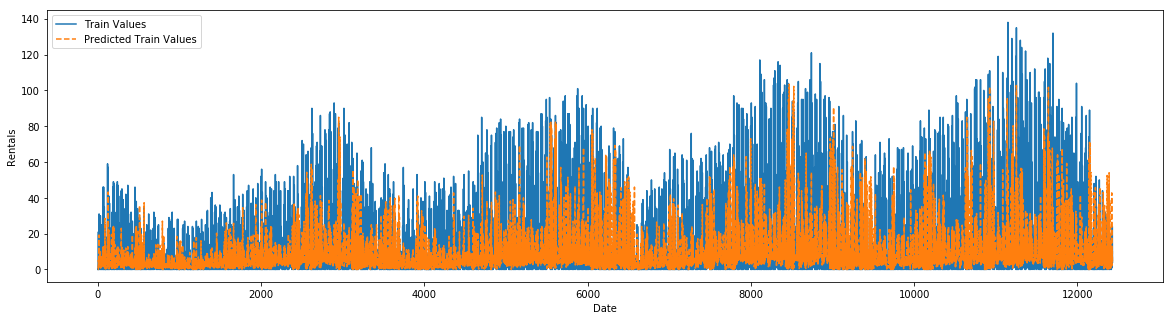

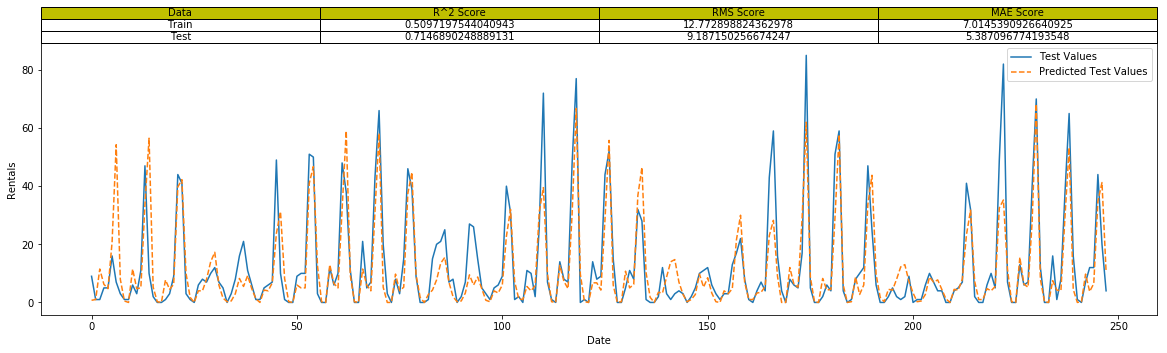

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9659443281654924', '3.3663711849638562', '1.6777831402831402'], ['Test', '0.7157053676089742', '9.170772296602344', '5.337903225806452']]


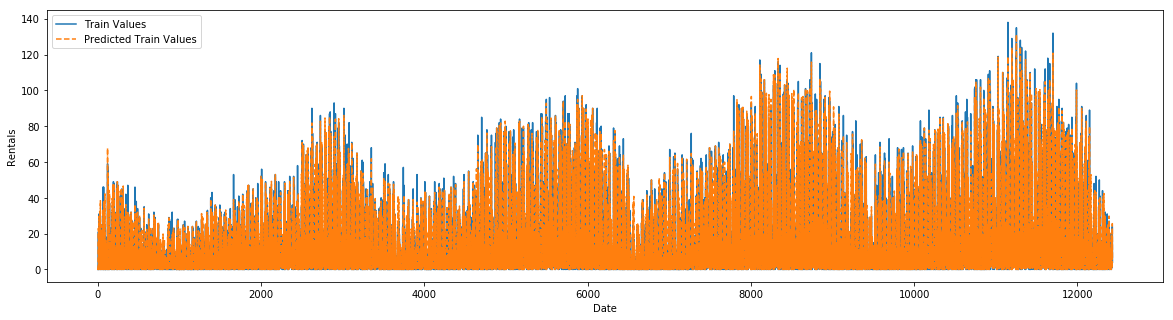

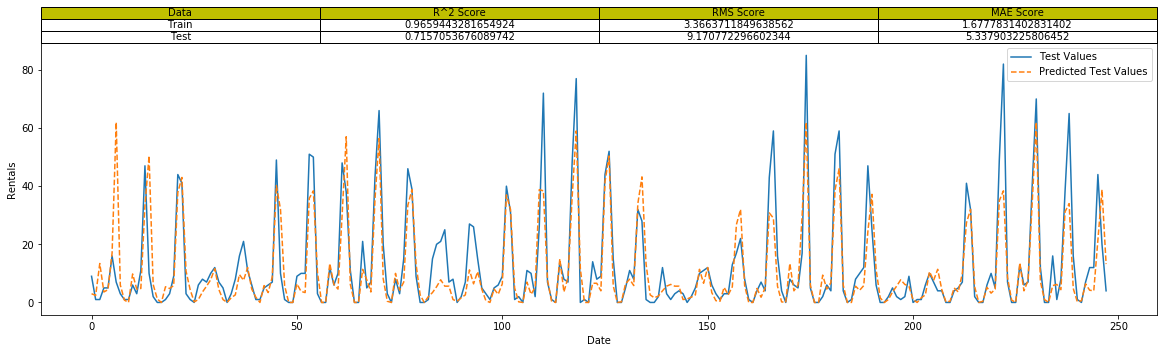

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9724224705997516', '3.0293186091134814', '1.5849259974259977'], ['Test', '0.69993730065698', '9.42166343781627', '5.672580645161291']]


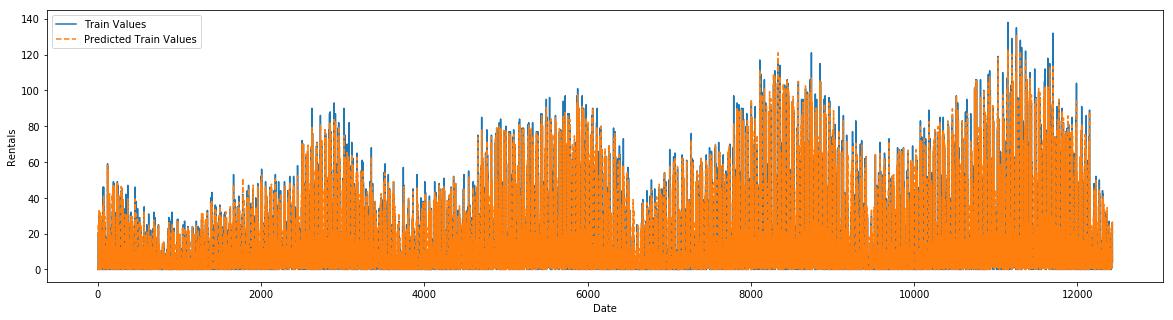

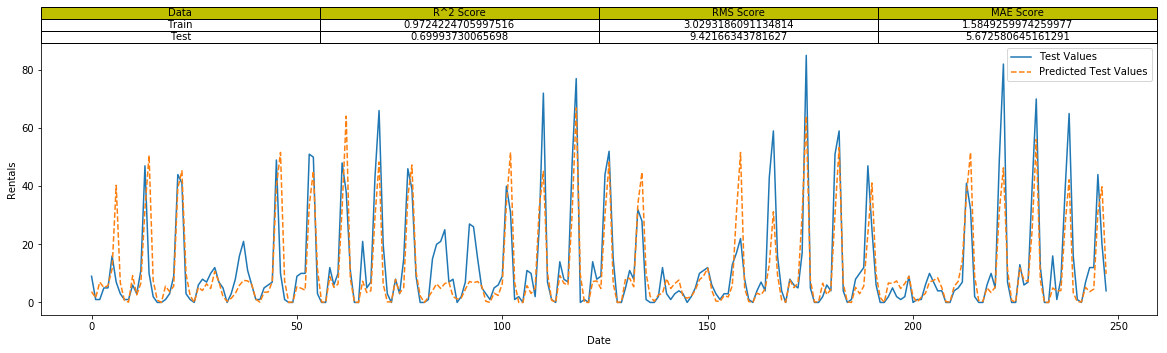

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9775715802511677', '2.7319114117024292', '1.498587516087516'], ['Test', '0.7104202546138538', '9.255623312517953', '5.5589516129032255']]


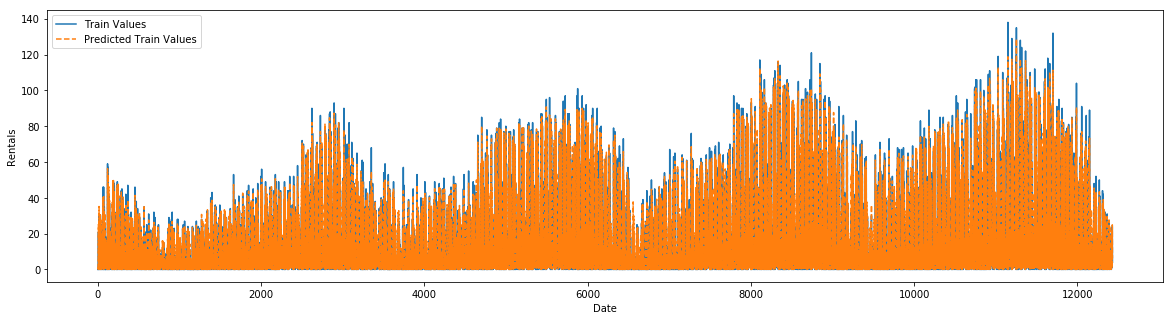

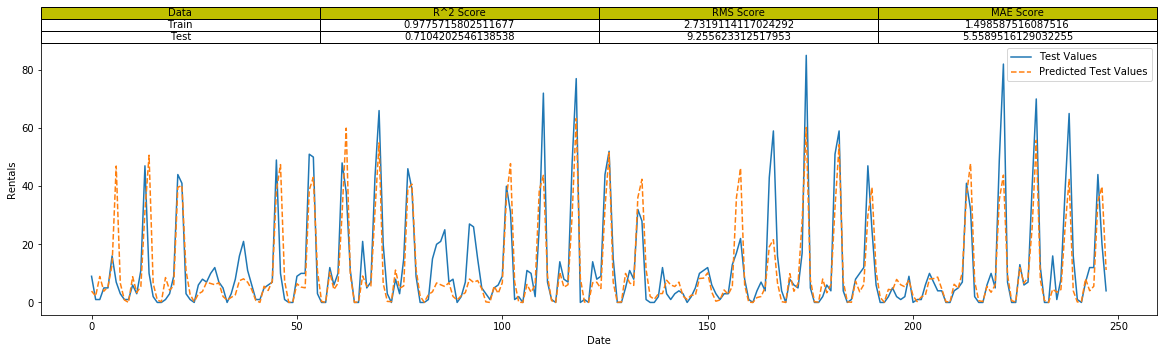

In [230]:
for model in models:
    modelPerformance(model, X_train, X_test, y_train, y_test)

## Scale

In [232]:
scaler = MinMaxScaler()

In [233]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

Performance and Predictions Trend: 
[['Train', '0.6074337580190905', '11.429408360180894', '7.694714245495495'], ['Test', '0.5781140851177657', '11.17169559127318', '7.540070564516129']]


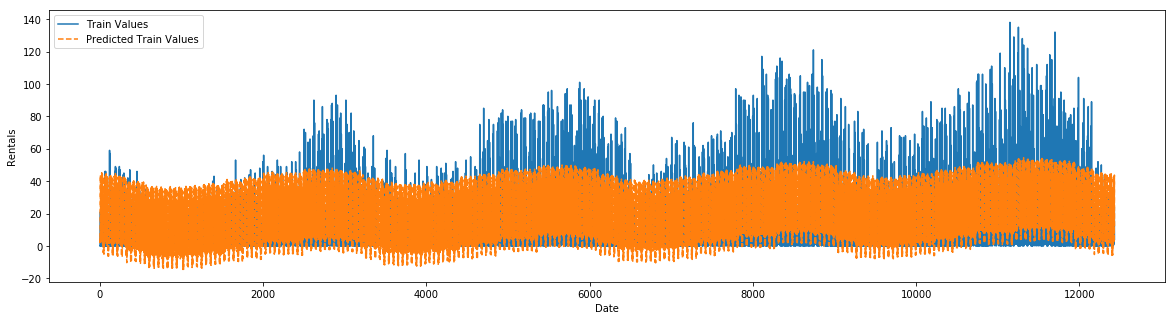

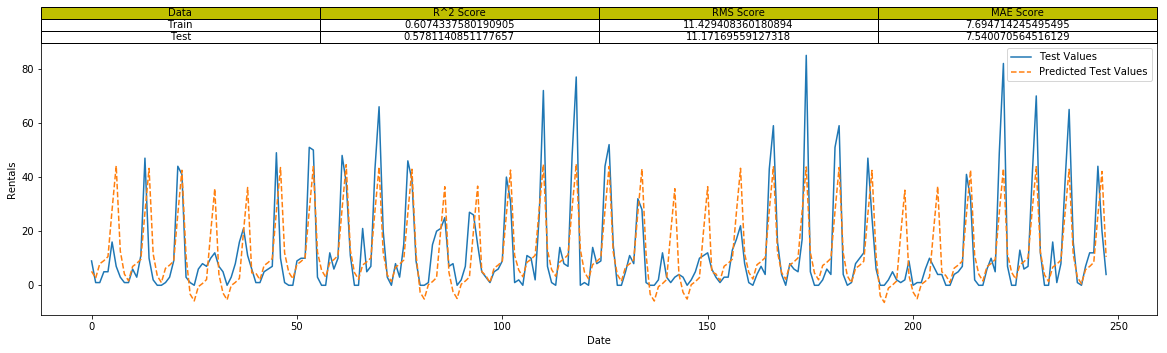

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '1.0', '0.0', '0.0'], ['Test', '0.46581522776217865', '12.570927802133445', '6.633064516129032']]


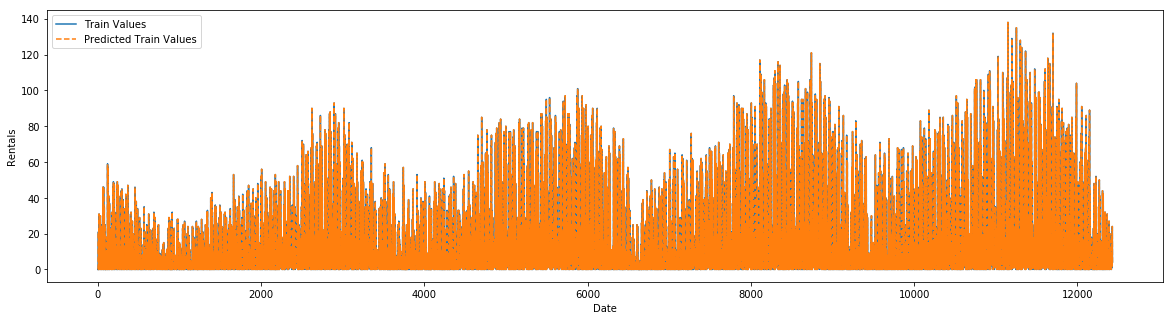

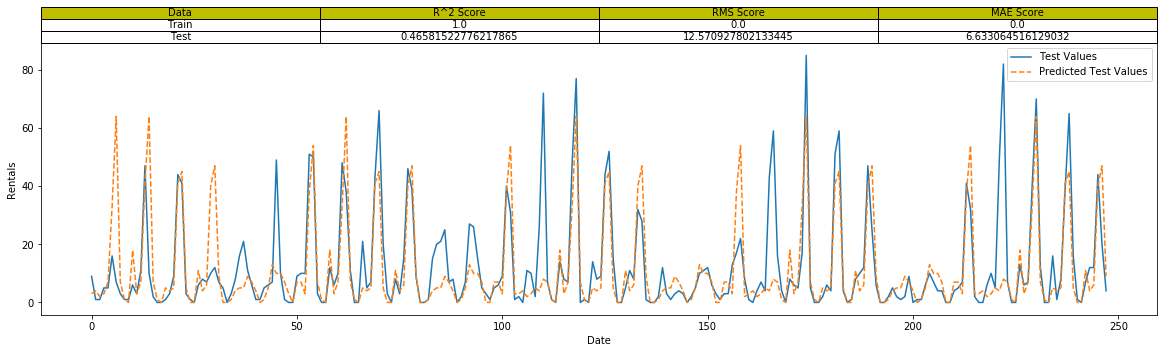

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.7670647516006774', '8.80409825448615', '4.580678893178893'], ['Test', '0.5994670555843307', '10.885307499323972', '6.290322580645161']]


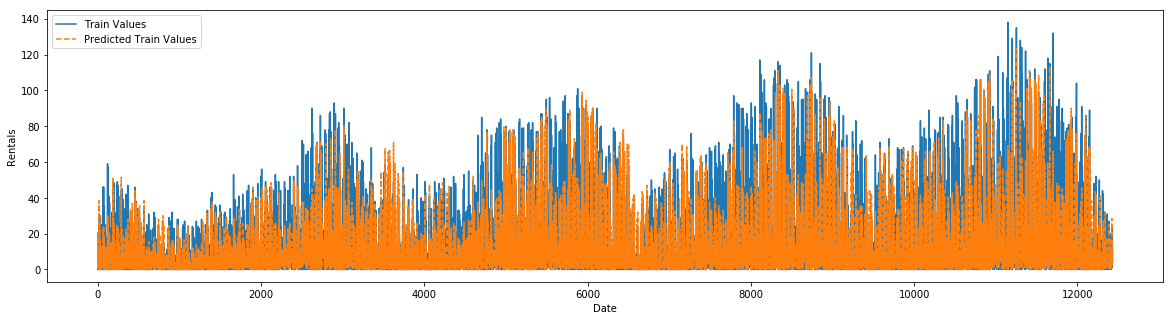

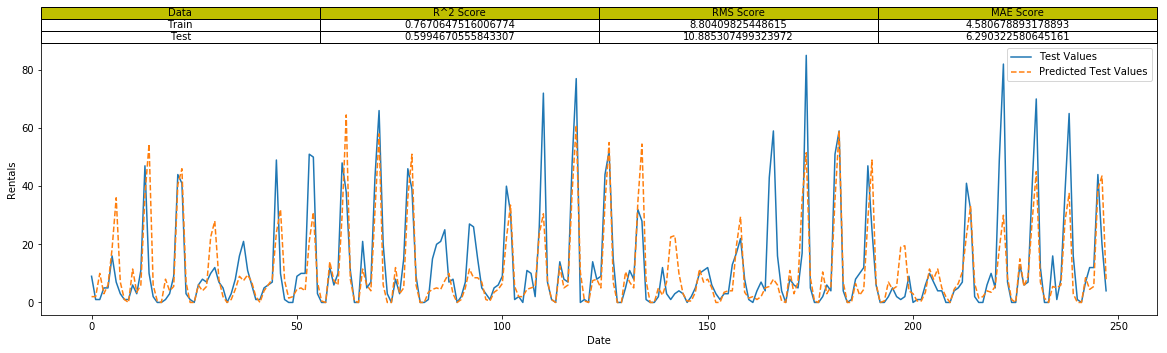

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.5904990727346631', '11.67332882650043', '6.35440797940798'], ['Test', '0.6562152616864609', '10.084743969576007', '5.823924731182795']]


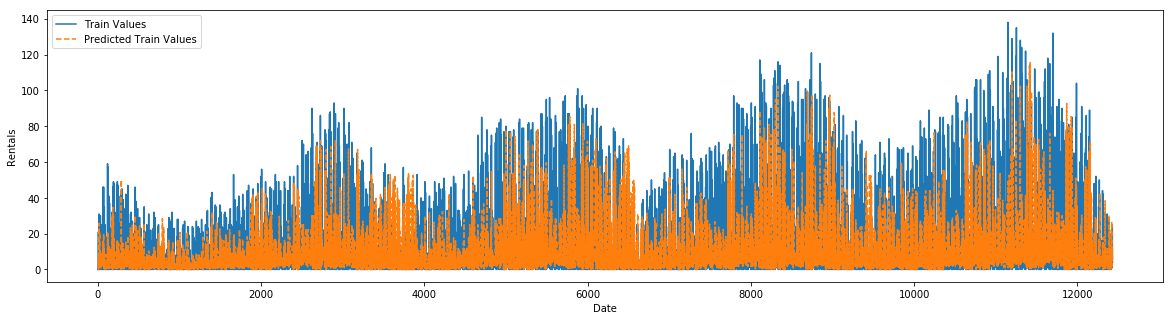

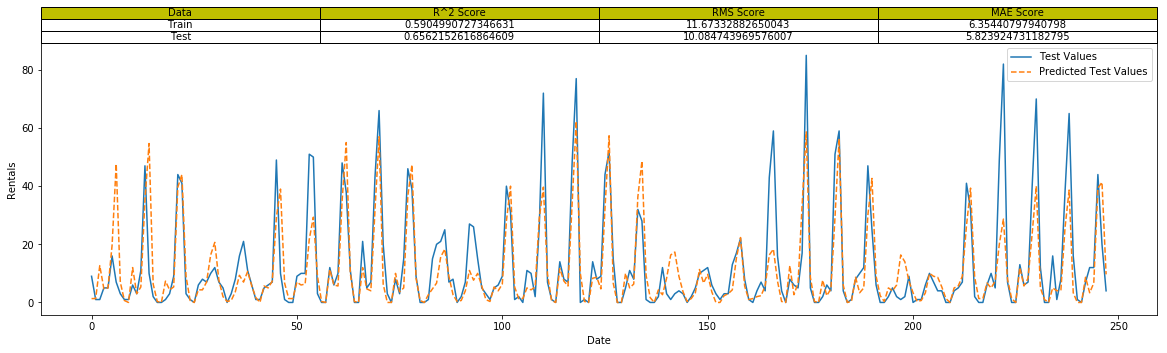

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.49750379835149716', '12.931046286043594', '7.166405244530244'], ['Test', '0.6610930131123409', '10.012945250057307', '5.798387096774194']]


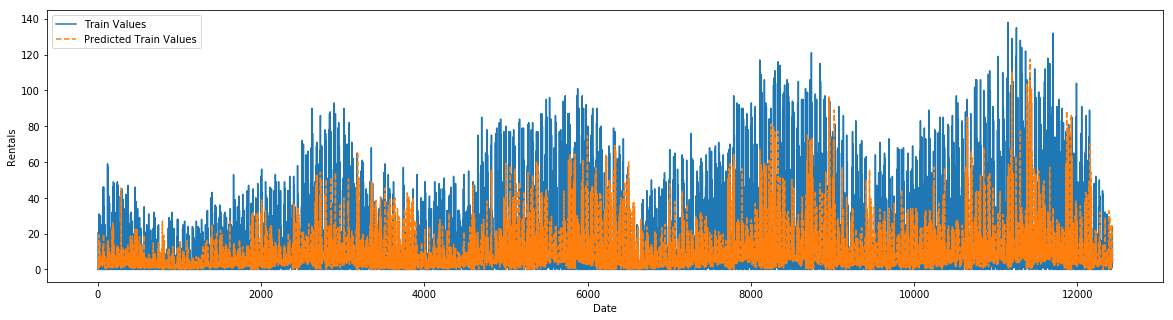

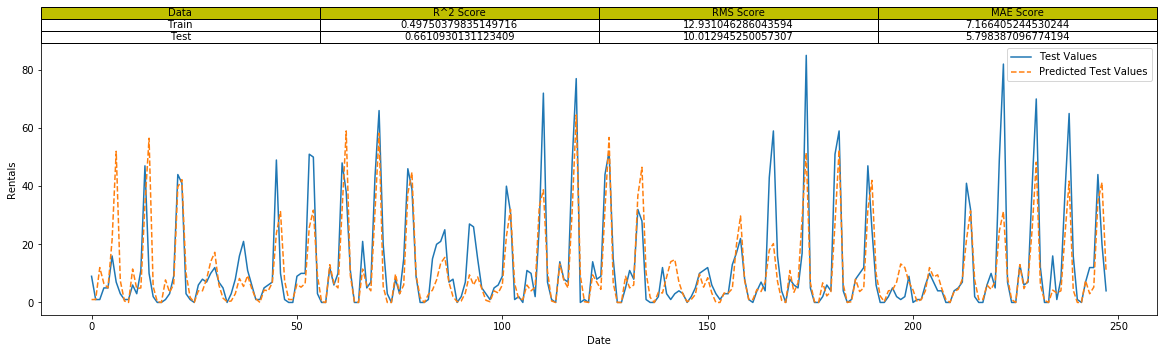

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.964919146303056', '3.416664626298163', '1.7174388674388679'], ['Test', '0.695987787258403', '9.483466087473401', '5.7935483870967746']]


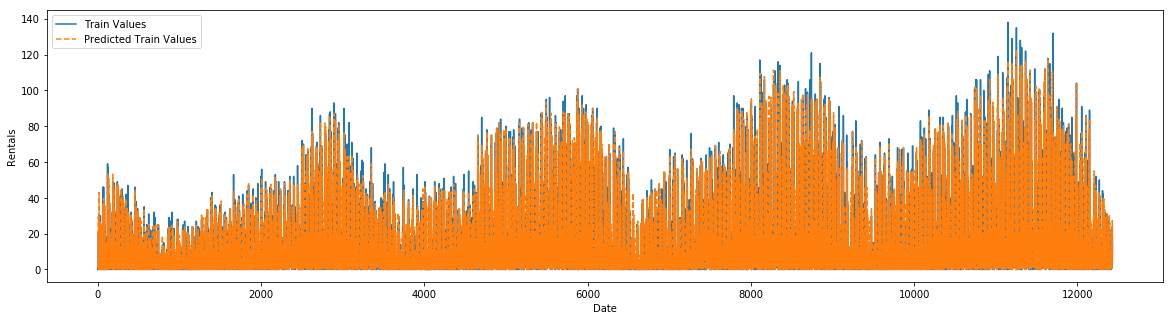

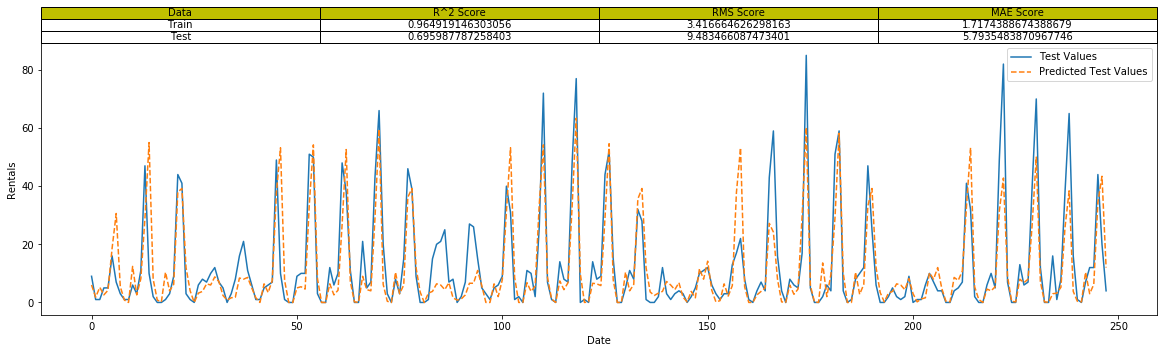

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9728639383125007', '3.004973756622889', '1.579786036036036'], ['Test', '0.6979622713518523', '9.452619537939325', '5.74516129032258']]


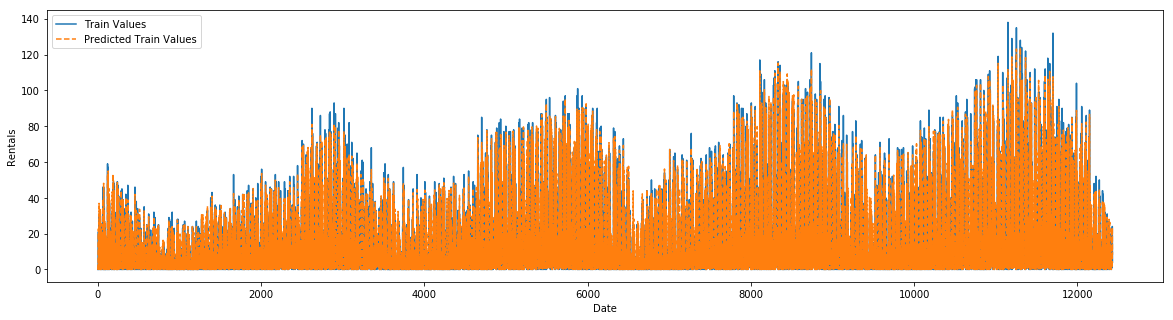

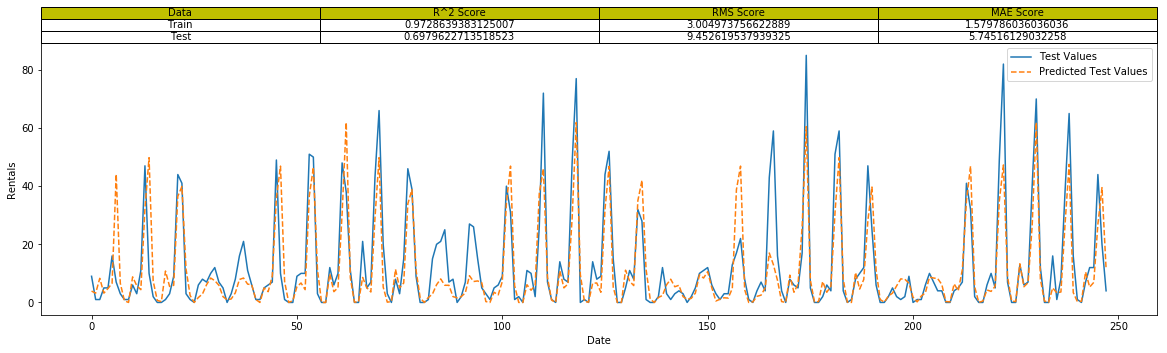

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9783002232295638', '2.687168548295735', '1.4880968468468472'], ['Test', '0.704005915546711', '9.357570249148116', '5.5925']]


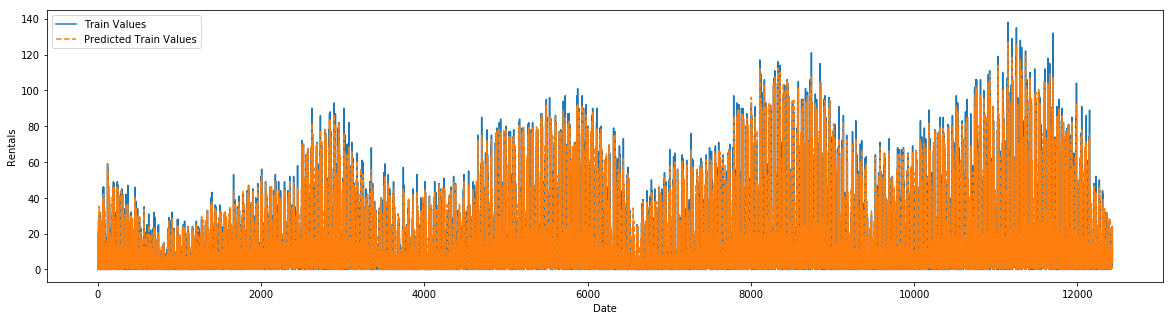

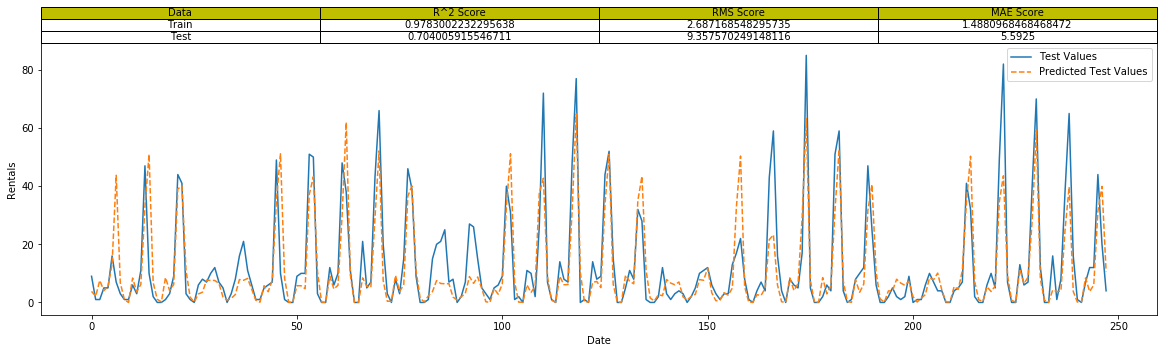

In [235]:
for model in models:
    modelPerformance(model, X_train_scaled, X_test_scaled, y_train, y_test)

## Test Data of 15 Days

In [242]:
grove_data[grove_data['YY'] == 2020][grove_data[grove_data['YY'] == 2020]['MM'] == 2].head()

YY MM DD Day     HH  Bookings
12680  2020  2  1   5    0-3         0
12681  2020  2  1   5    3-6         0
12682  2020  2  1   5    6-9         0
12683  2020  2  1   5   9-12         6
12684  2020  2  1   5  12-15        12

In [243]:
X_train, X_test, y_train, y_test = tt_split(genMemDataset(grove_dummies, 8), 12680, 12799)

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

Performance and Predictions Trend: 
[['Train', '0.6089834818956301', '11.394455493597823', '7.654818119085173'], ['Test', '0.5222811952621171', '10.573250753201288', '7.4724609375']]


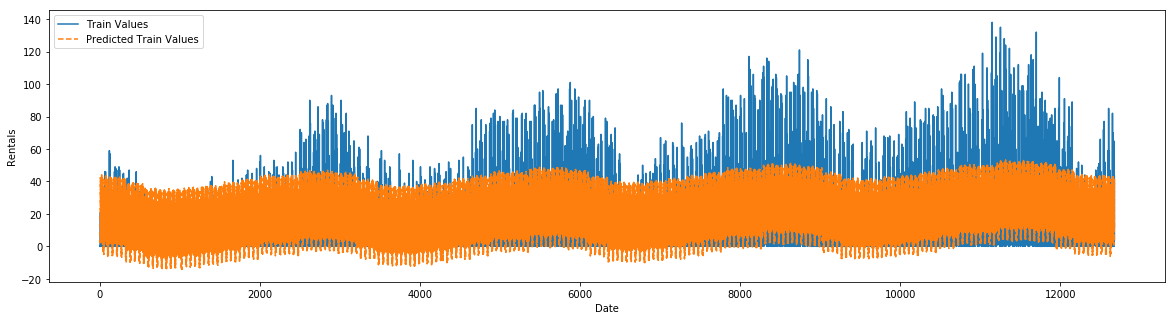

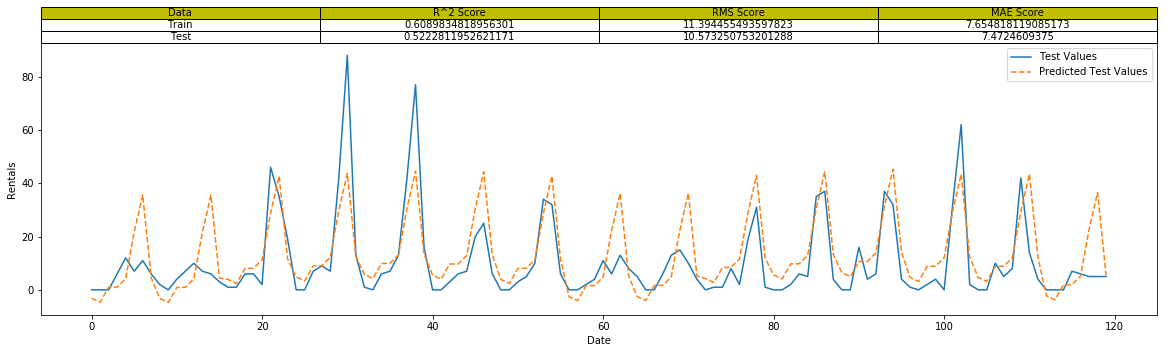

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '1.0', '0.0', '0.0'], ['Test', '0.4861452704948388', '10.965856099730654', '5.833333333333333']]


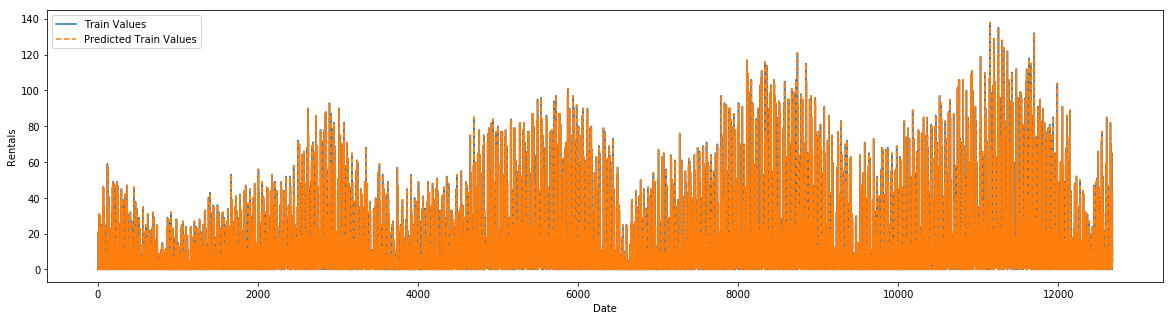

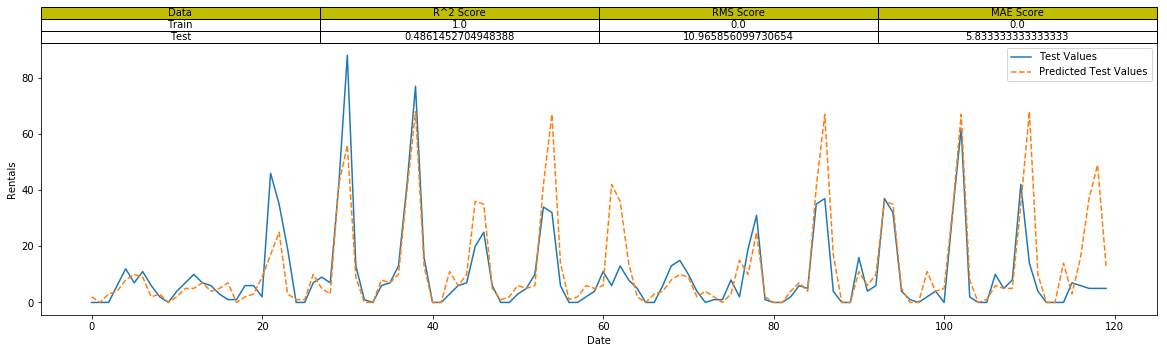

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.785405287126733', '8.441226102128502', '4.460567823343848'], ['Test', '0.6605638751460017', '8.912537984958792', '5.016666666666667']]


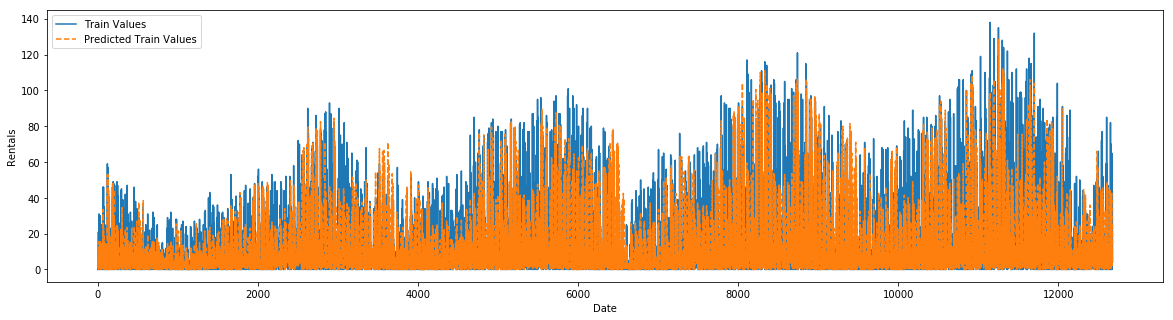

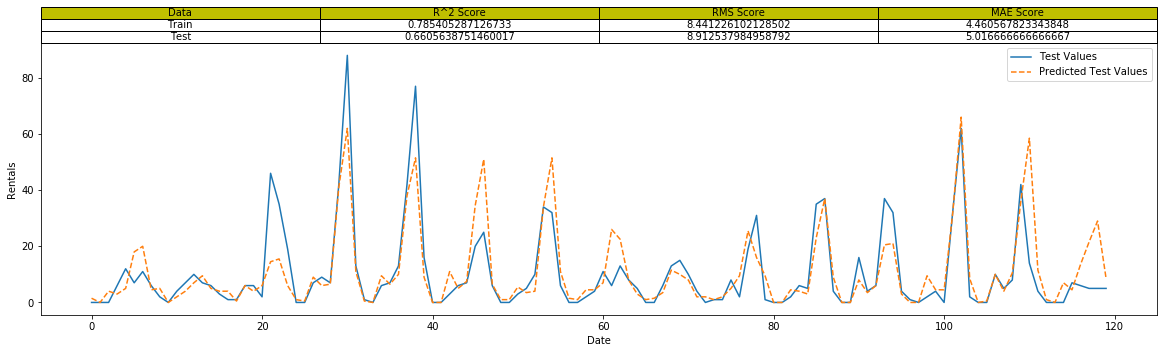

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.6186954246111038', '11.25205982622661', '6.135383806519452'], ['Test', '0.7161830014465642', '8.149698926499836', '4.463888888888889']]


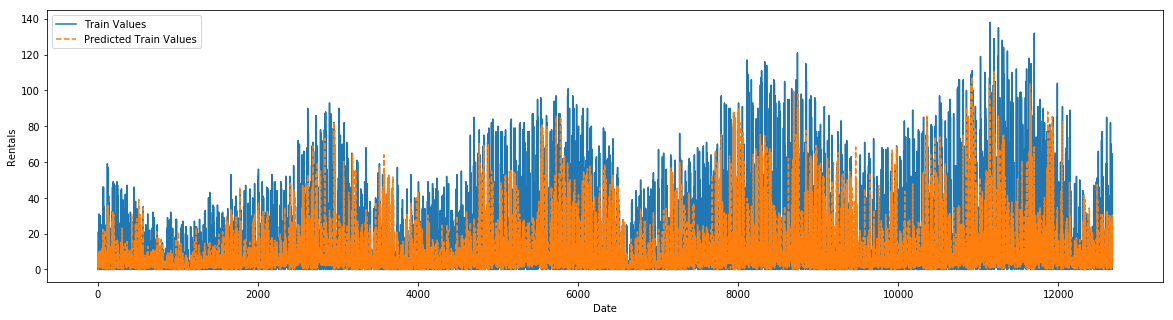

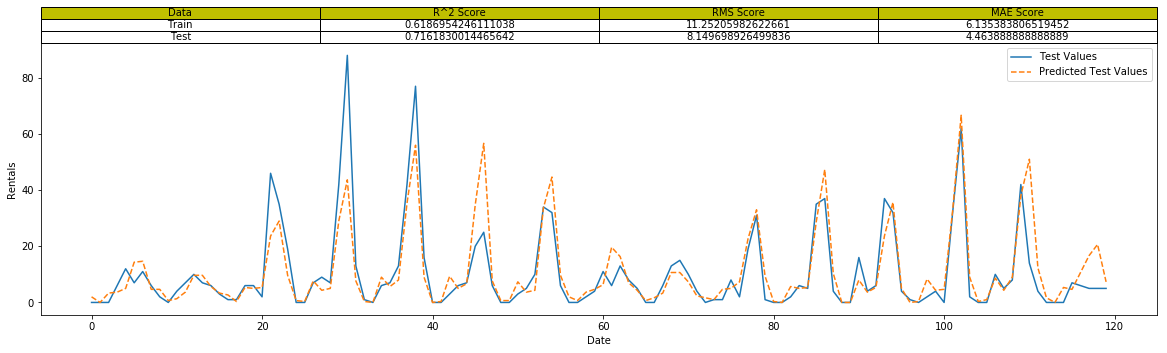

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.5221841829771438', '12.59581534774339', '6.939629337539432'], ['Test', '0.7137142770661019', '8.18506643222888', '4.460416666666666']]


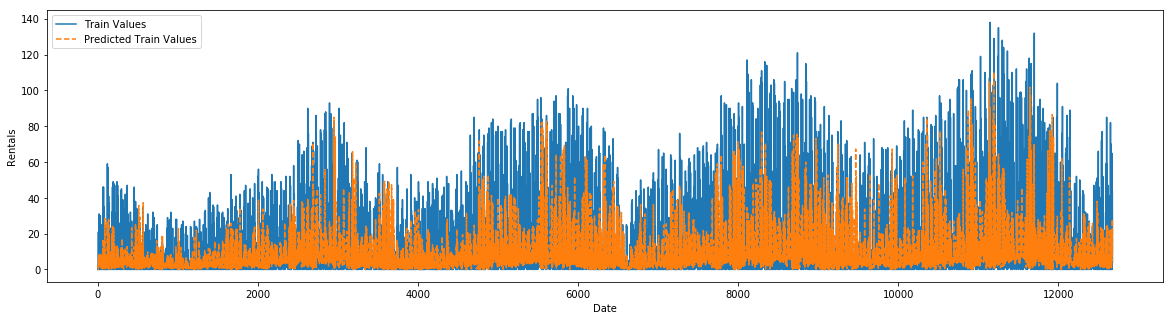

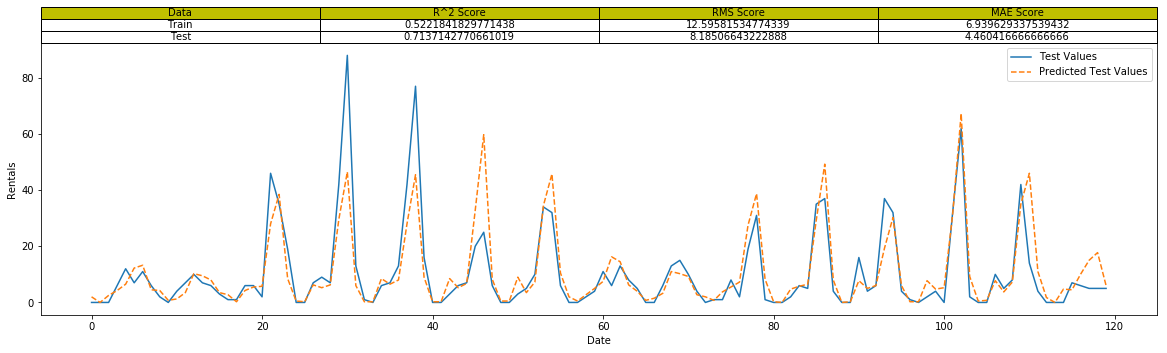

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9636266932248142', '3.475260923413437', '1.7129337539432177'], ['Test', '0.761839193975709', '7.465476095557023', '4.5600000000000005']]


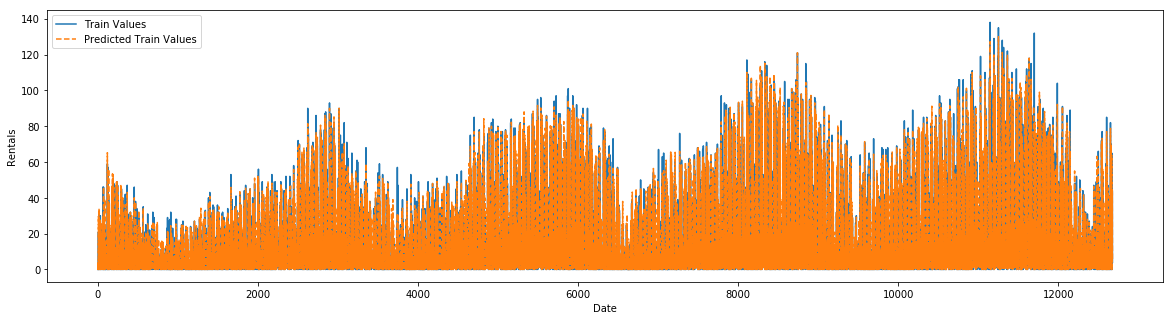

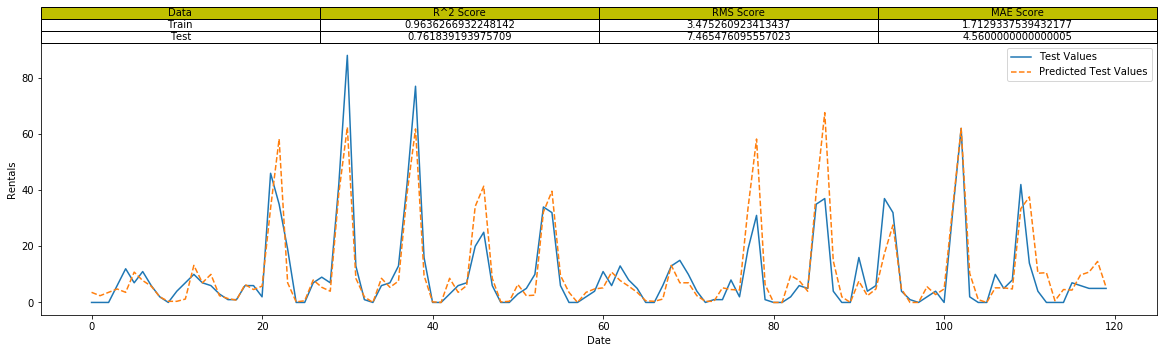

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9710197779695077', '3.102036321118667', '1.605268138801262'], ['Test', '0.791161674912399', '6.9908094428804635', '4.089166666666666']]


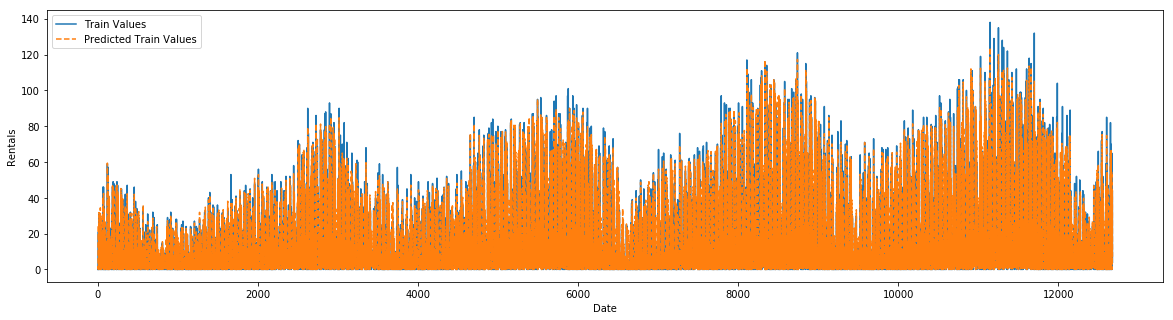

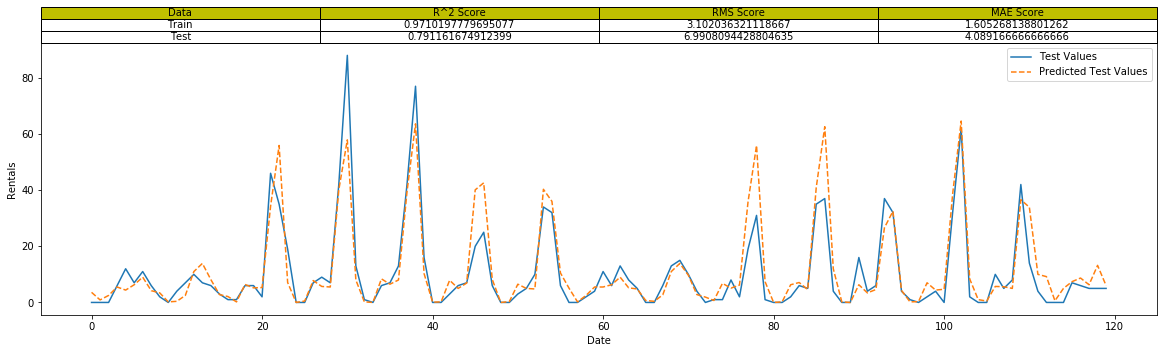

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9775026938065239', '2.7331362602392697', '1.5011041009463721'], ['Test', '0.7599246916159419', '7.495422380804612', '4.351166666666667']]


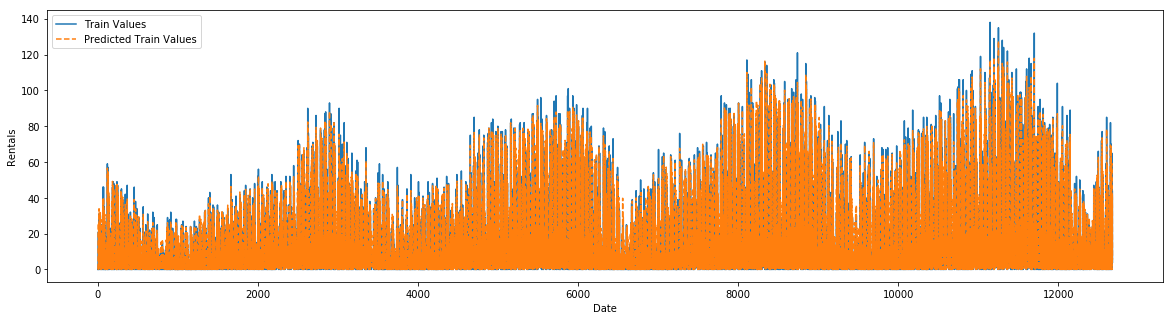

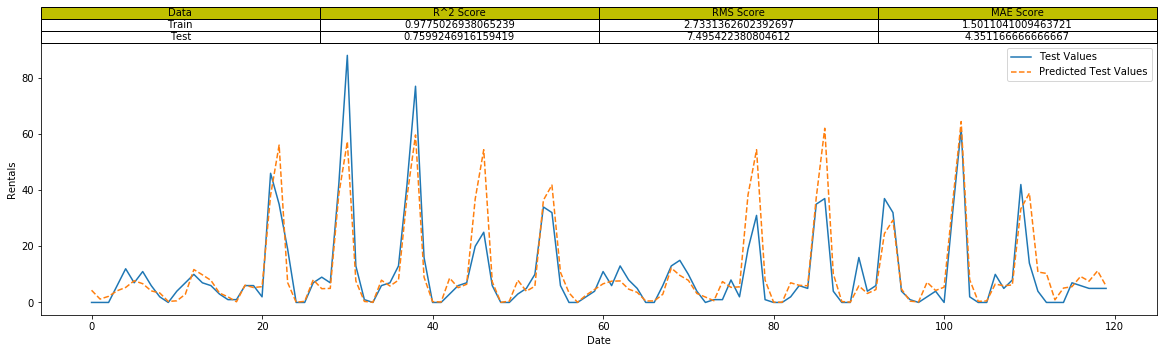

In [246]:
for model in models:
    modelPerformance(model, X_train, X_test, y_train, y_test)

In [13]:
def retrieveData(data, yy = None, mm = None, dd = None):
    data = data
    
    if yy != None:
        
        data = data[data['YY'] == yy]
        
        if mm != None:
            
            data = data[data['MM'] == mm]
            
            if dd != None:
                
                data = data[data['DD'] == dd]
                
    return data
            

In [44]:
memory_dataset = genMemDataset(grove_dummies, 8)

In [64]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Test for Jan

###### Test from 1 jan +7 days

In [79]:
retrieveData(grove_data,yy = 2020, mm = 1).iloc[[0,-1],:]

YY MM  DD Day     HH  Bookings
12432  2020  1   1   2    0-3         9
12679  2020  1  31   4  21-24         4

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.972421822772455', '3.0293541899614196', '1.5962676962676963'], ['Test', '0.47426590874102265', '9.833589054064163', '5.408771929824562']]


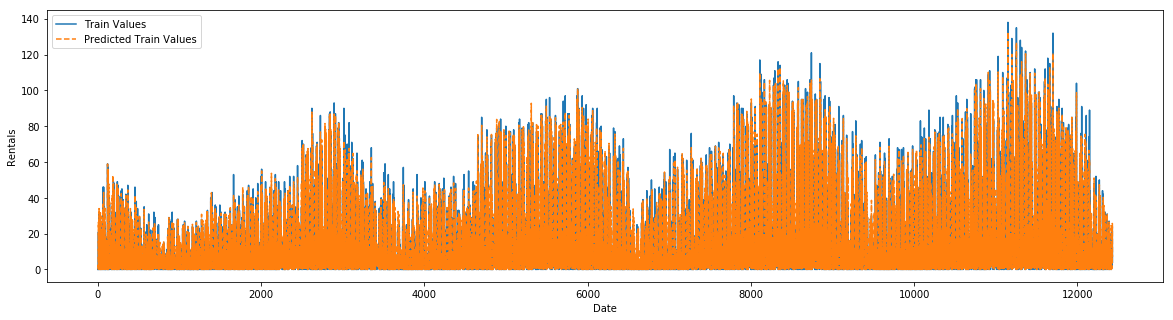

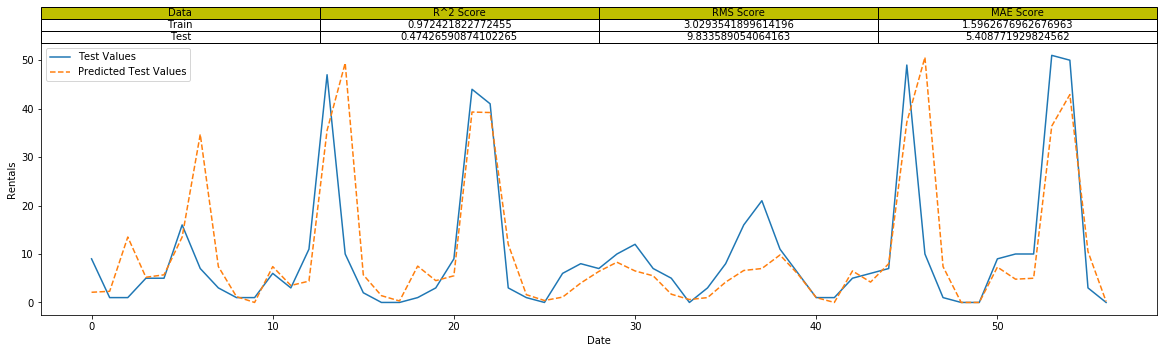

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
X_train, X_test, y_train, y_test = tt_split(memory_dataset,12432, test_days = 7)
modelPerformance(model,X_train,X_test,y_train,y_test)

###### Test from 15 jan +7 days

In [77]:
retrieveData(grove_data,yy = 2020, mm = 1).iloc[[0,-1],:]

YY MM  DD Day     HH  Bookings
12432  2020  1   1   2    0-3         9
12679  2020  1  31   4  21-24         4

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9727631381972393', '3.00676082362901', '1.5869738520408163'], ['Test', '0.7374485364370712', '8.408788218182547', '5.094736842105264']]


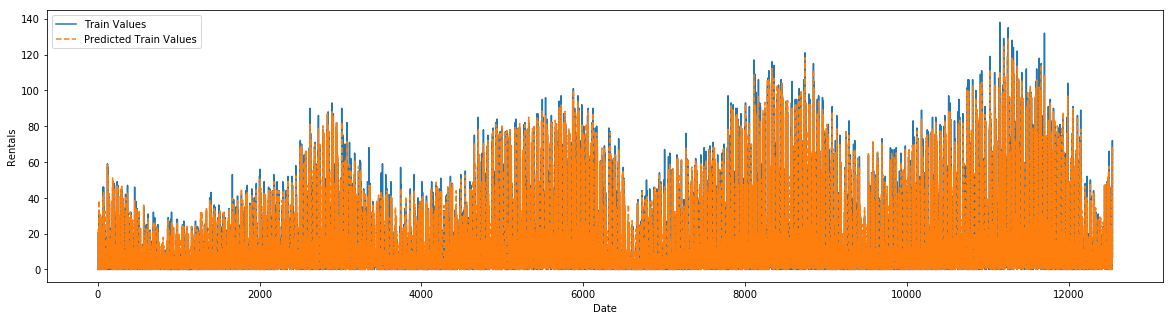

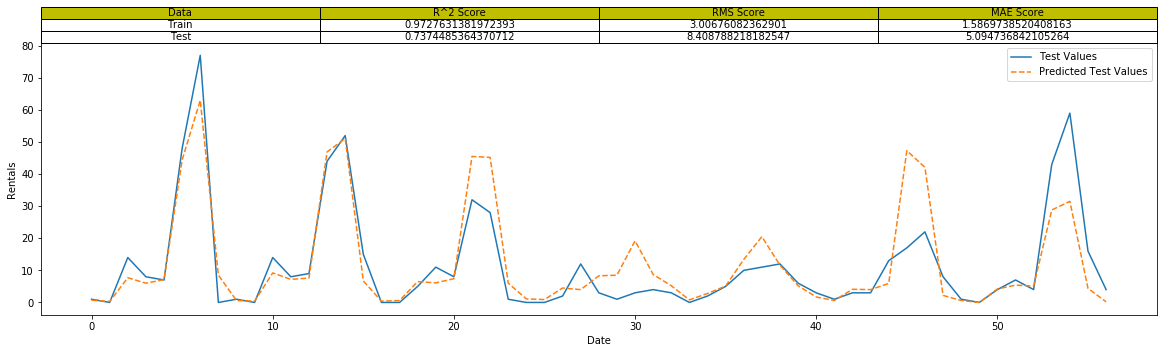

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
X_train, X_test, y_train, y_test = tt_split(memory_dataset,12544, test_days = 7)
modelPerformance(model,X_train,X_test,y_train,y_test)

##### Test for Feb

In [81]:
retrieveData(grove_data,yy = 2020, mm = 2).iloc[[0,-1],:]

YY MM  DD Day     HH  Bookings
12680  2020  2   1   5    0-3         0
12911  2020  2  29   5  21-24         7

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9722065960153211', '3.0378539764666743', '1.5921451104100948'], ['Test', '0.8441678291134385', '6.982559727698518', '3.9684210526315793']]


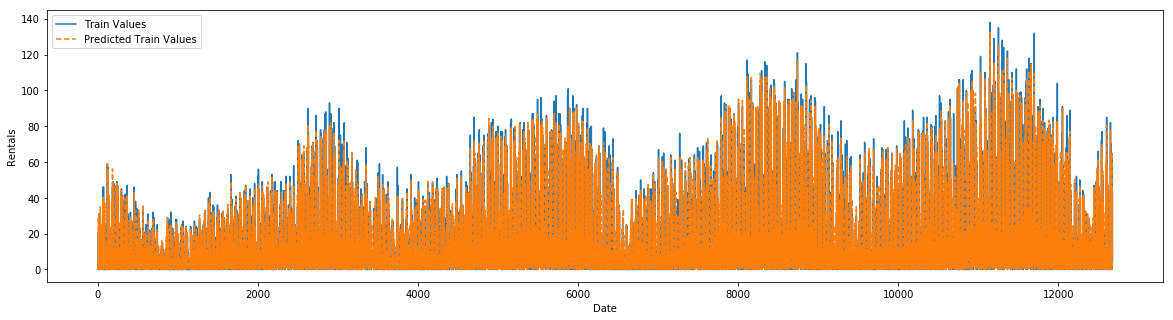

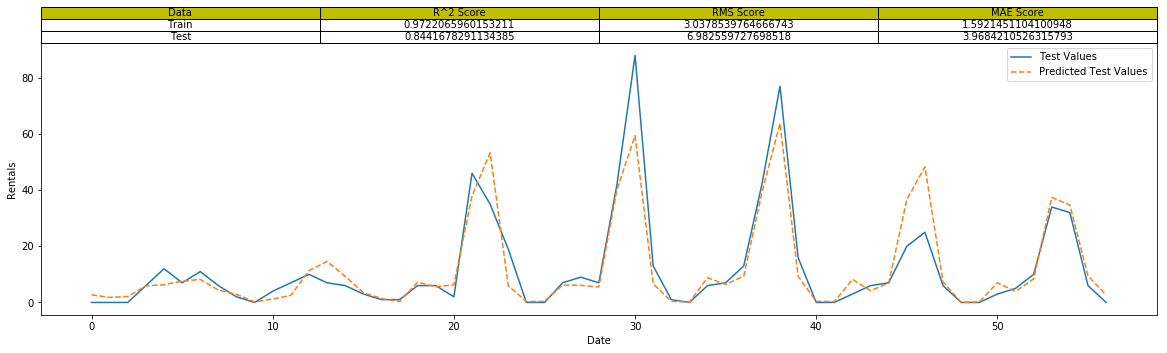

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
X_train, X_test, y_train, y_test = tt_split(memory_dataset,12680, test_days = 7)
modelPerformance(model,X_train,X_test,y_train,y_test)

##### Test for March

In [83]:
retrieveData(grove_data, yy=2020, mm=3).iloc[[0,-1],:]

YY MM  DD Day     HH  Bookings
12912  2020  3   1   6    0-3         0
13159  2020  3  31   1  21-24         1

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9727957968478593', '2.994795542398225', '1.5772846964064438'], ['Test', '-3.3194270488235604', '17.365273707134442', '8.683935742971888']]


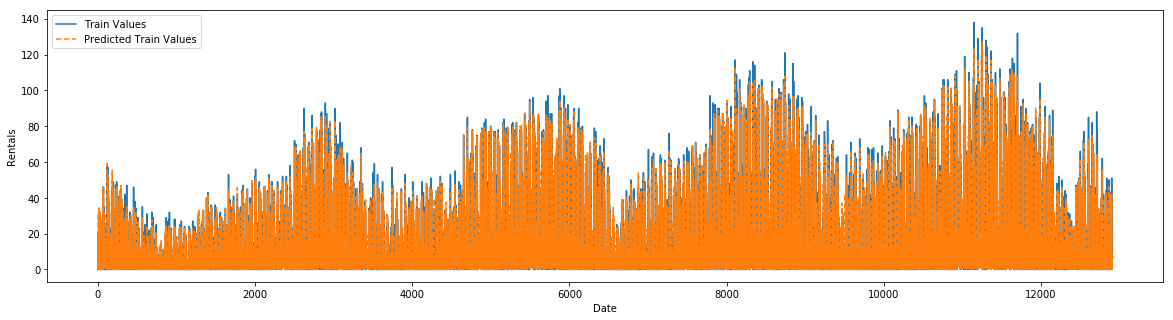

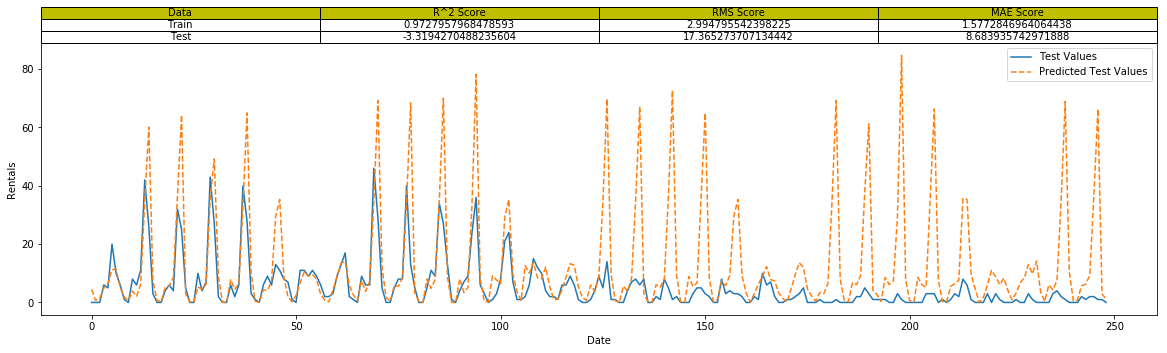

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [84]:
X_train, X_test, y_train, y_test = tt_split(memory_dataset,12912, test_days = 31)
modelPerformance(model,X_train,X_test,y_train,y_test)

##### Test for July 2019

In [92]:
retrieveData(grove_data, yy = 2019, mm = 7).iloc[[0,-1]]

YY MM  DD Day     HH  Bookings
10960  2019  7   1   0    0-3         4
11207  2019  7  31   2  21-24        17

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9717676819066404', '2.8930077105218173', '1.5139872262773721'], ['Test', '0.8413502366794534', '10.074304265094579', '5.726506024096386']]


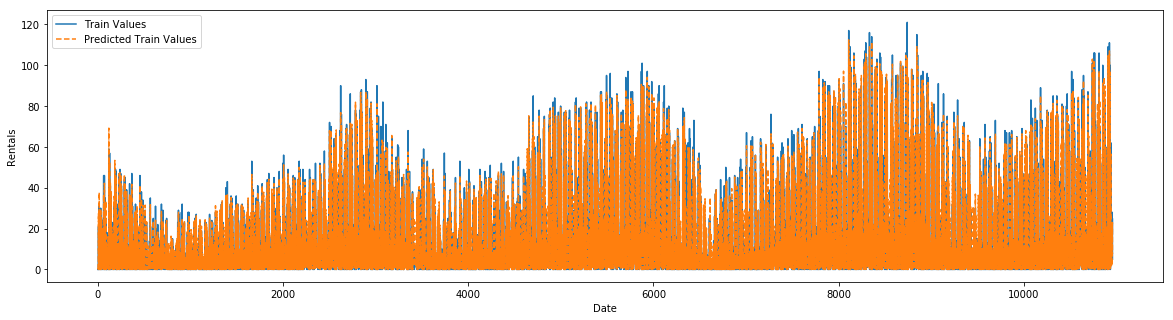

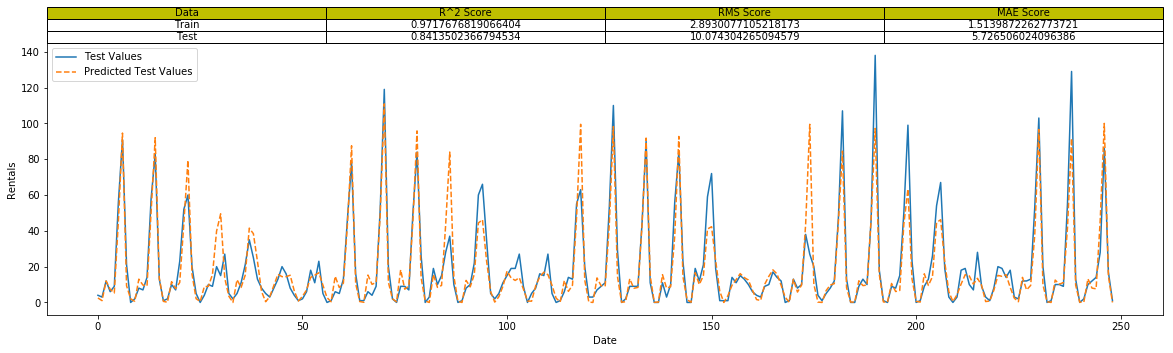

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
X_train, X_test, y_train, y_test = tt_split(memory_dataset,10960, test_days = 31)
modelPerformance(model,X_train,X_test,y_train,y_test)